# 2.7.1 Distribución t de Student

**Distribución de Student:** $\;$ pdf de **media** $\mu,\,$ **parámetro de escala** $\,\sigma>0\,$ y **grados de libertad (normalidad)** $\,\nu>0$
$$\mathcal{T}(y\mid\mu,\sigma^2,\nu)\propto\left[1+\frac{1}{\nu}\left(\frac{y-\mu}{\sigma}\right)^2\right]^{-\frac{\nu+1}{2}}$$

**Heavy tails:** $\;$ la pdf decae como una función polinómica del cuadrado de la distancia a su centro, por lo que concentra mayor probabilidad en sus colas que la Gaussiana

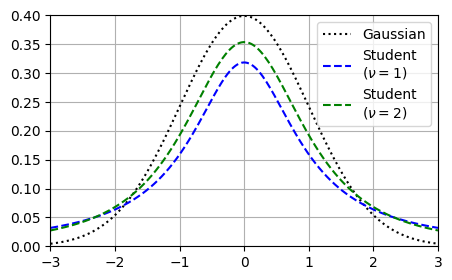

In [1]:
import numpy as np; import matplotlib.pyplot as plt; from scipy.stats import t, norm
Y = norm(0, 1); x = np.linspace(-3, 3, 200); T1 = t(df=1, loc=0, scale=1); T2 = t(df=2, loc=0, scale=1)
fig = plt.subplots(figsize=(5,3)); plt.grid(); plt.xlim(-3, 3); plt.ylim(0, .4);
plt.plot(x, Y.pdf(x), "k:", label="Gaussian"); plt.plot(x, T1.pdf(x), "b--", label="Student\n" + r"$(\nu=1)$");
plt.plot(x, T2.pdf(x), "g--", label="Student\n" + r"$(\nu=2)$"); plt.legend();